In [1]:
from tree import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot(title, y, y1=None, x=None, label1=None, label2=None, xlabel=None, ylabel=None):
    if x is None:
        x = [i for i in range(len(y))]
        
    fig = plt.figure()
    plt.figure(figsize=(16,6), dpi= 80)
    plt.title(title, fontsize=17)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)
    plt.grid(axis='both', alpha=.3)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(x, y, color='tab:red',label=label1);
    if y1 is not None:
        plt.plot(x, y1, color='tab:purple',label=label2)
    plt.legend()
    plt.show();

In [2]:
n_data = 400
X = np.linspace(-2, 4, n_data).reshape(-1, 1)
y = X[:, 0] ** 2 -  X[:, 0] + 3 * np.random.rand(n_data) + 3 * np.cos(X[:, 0])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
forest = RandomForestRegressor(10, min_samples_leaf=10)
forest.fit(X_train, y_train)
mae(y_test, forest.predict(X_test))

0.8490449802887209

In [5]:
mu = y_train.mean() 
sd_prior = y_train.std()
prior_obs = 2
kappa = prior_obs
alpha = prior_obs/2
var_prior = sd_prior**2
tau_prior = 1/var_prior
beta = alpha/tau_prior
mu

partition = (0.9, 20)
prior = [mu, kappa, alpha, beta]
b_tree = BayesianDecisionTree(partition_prior=partition,prior=prior)
b_tree.fit(X_train, y_train)
print(mae(y_test, b_tree.predict(X_test)))
len(np.unique(b_tree.predict(X_test))), len(X_test)

0.8410270738769823


(11, 100)

In [6]:
tree = DecisionTreeRegressor(min_samples_leaf=10)
tree.fit(X_train, y_train)
print(mae(y_test, tree.predict(X_test)))
len(np.unique(tree.predict(X_test))), len(X_test)

0.7889060187990503


(23, 100)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

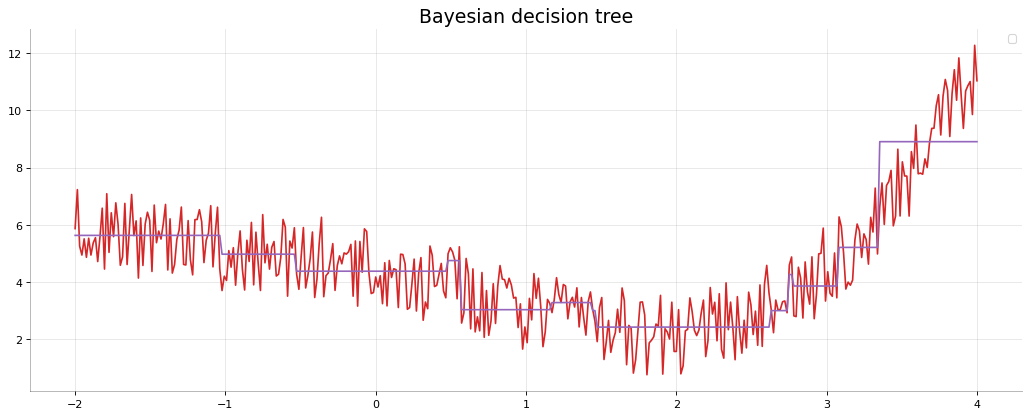

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

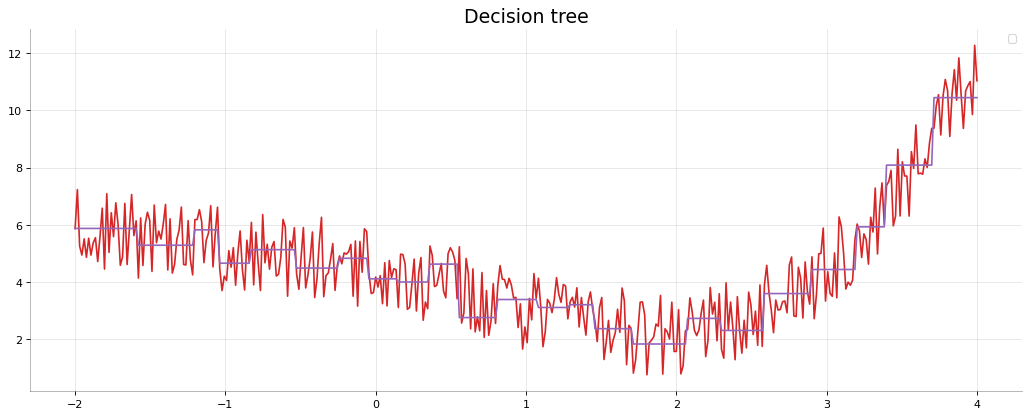

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

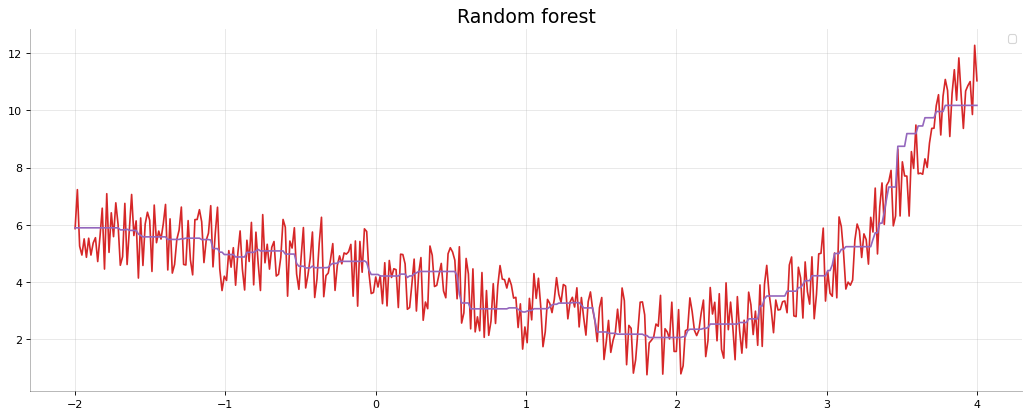

In [7]:
plot("Bayesian decision tree", y, x=X[:, 0], y1=b_tree.predict(X))
plot("Decision tree", y, x=X[:, 0], y1=tree.predict(X))
plot("Random forest", y, x=X[:, 0], y1=forest.predict(X))


In [8]:
X = np.random.rand(10000, 10) * 10 - 5
y = X[:,0]*X[:,1] + 2*X[:,2] - X[:,3] + np.cos(X[:,4]) + X[:,5] + np.random.rand(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
mu = y_train.mean() 
sd_prior = y_train.std()
prior_obs = 3
kappa = prior_obs
alpha = prior_obs/2
var_prior = sd_prior**2
tau_prior = 1/var_prior
beta = alpha/tau_prior
mu

partition = (0.9, 400)
prior = [mu, kappa, alpha, beta]
b_tree = BayesianDecisionTree(partition_prior=partition,prior=prior)
b_tree.fit(X_train, y_train)
print(mae(y_test, b_tree.predict(X_test)))
len(np.unique(b_tree.predict(X_test))), len(X_test)

3.251734870876237


(392, 2500)

In [10]:
forest = RandomForestRegressor(100)
forest.fit(X_train, y_train)
mae(y_test, forest.predict(X_test))

3.3831641452861936

In [11]:
tree = DecisionTreeRegressor(min_samples_leaf=10)
tree.fit(X_train, y_train)
print(mae(y_test, tree.predict(X_test)))
len(np.unique(tree.predict(X_test))), len(X_test)

6.01886788630754


(558, 2500)

In [13]:
from sklearn.datasets import make_regression

X, y = make_regression(1000, 15, noise=2)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
partition = (0.9, 40)
b_tree = BayesianDecisionTree(partition_prior=partition)
b_tree.fit(X_train, y_train)
print(mae(y_test, b_tree.predict(X_test)))
# len(np.unique(b_tree.predict(X_test))), len(X_test)

90.34855867097646


In [15]:
forest = RandomForestRegressor(100)
forest.fit(X_train, y_train)
mae(y_test, forest.predict(X_test))

57.98665090580985

In [16]:
tree = DecisionTreeRegressor(min_samples_leaf=10)
tree.fit(X_train, y_train)
print(mae(y_test, tree.predict(X_test)))
# len(np.unique(tree.predict(X_test))), len(X_test)

94.59558234549016


In [17]:
from pmlb import fetch_data
from pmlb import regression_dataset_names

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 
from tqdm.notebook import tqdm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sb

from pmlb import fetch_data, regression_dataset_names

partition = (0.9, 10)

tree_test_scores = []
b_tree_test_scores = []

for regression_dataset in tqdm(regression_dataset_names):
    X, y = fetch_data(regression_dataset, return_X_y=True)
    train_X, test_X, train_y, test_y = train_test_split(X, y)

    tree = DecisionTreeRegressor(min_samples_leaf=20)
    b_tree = BayesianDecisionTree(partition_prior=partition)
    
    b_tree.fit(train_X, train_y)
    tree.fit(train_X, train_y)

    b_tree_test_scores.append(mse(b_tree.predict(test_X), test_y))
    tree_test_scores.append(mse(tree.predict(test_X), test_y))

sb.boxplot(data=[tree_test_scores, b_tree_test_scores], notch=True)
plt.xticks([0, 1], ['Tree', 'B_tree'])
plt.ylabel('Test Accuracy')

ConnectionError: HTTPSConnectionPool(host='github.com', port=443): Max retries exceeded with url: /EpistasisLab/penn-ml-benchmarks/raw/master/datasets/1027_ESL/1027_ESL.tsv.gz (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fd334a847c0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [53]:
(np.array(tree_test_scores) > np.array(b_tree_test_scores)).mean()

0.39

In [47]:
tree_test_scores

[]

In [52]:
(np.array(b_tree_test_scores) < np.array(tree_test_scores)

array([ True, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False])

In [42]:
b_tree_test_scores

[0.4109862415584335,
 0.41325347152357894,
 0.4302307584194616,
 3.00401206488411,
 752.7077120144613,
 15.609422862519777,
 775810.88470542,
 217303.10798546608,
 88555.45912662018,
 148.89031753750373,
 91.80194272807009,
 7.697799239884356,
 0.43041027685228295,
 18.012624308166412,
 6483708.607230592,
 12.65199101751012,
 56.4382652339472,
 8052807.1441943105,
 0.22260429236700208,
 0.9839361931093805,
 1282625341.6131315,
 11.1444579066559,
 12.031671205174279,
 213.15066983035717,
 5.519147710884017,
 6450.226738104347,
 0.7872409709810737,
 0.035348997558372744,
 0.46911923334179456,
 44139.574922843494,
 14.19603785233362,
 12.94562398154226,
 2.365997491195154,
 0.6137196684631017,
 0.6672388977777779,
 915174461.9285758,
 3.3963314069089994,
 3350092057.3017054,
 2043.6759025162073,
 0.33376055920763475,
 1010076.2261058335,
 908250.2417135475,
 1.767346839999562,
 5941.41414860098,
 13.808193842516772,
 3.1424097140710225,
 13.634879864158892,
 1621084878.3760571,
 0.3399661

In [81]:
from sklearn.datasets import make_regression

datasets = [make_regression(2000, 15, noise=3, n_informative=10) for i in range(50)]

Text(0, 0.5, 'Test Accuracy')

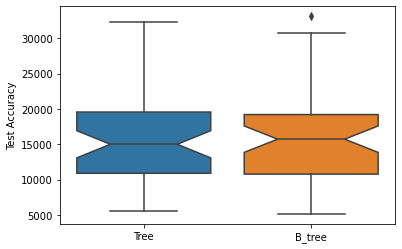

In [82]:
partition = (0.9, 20)

tree_test_scores = []
b_tree_test_scores = []

for regression_dataset in tqdm(datasets):
    X, y = regression_dataset
    train_X, test_X, train_y, test_y = train_test_split(X, y)

    tree = DecisionTreeRegressor(min_samples_leaf=20)
    b_tree = BayesianDecisionTree(partition_prior=partition)
    
    b_tree.fit(train_X, train_y)
    tree.fit(train_X, train_y)

    b_tree_test_scores.append(mse(b_tree.predict(test_X), test_y))
    tree_test_scores.append(mse(tree.predict(test_X), test_y))

sb.boxplot(data=[tree_test_scores, b_tree_test_scores], notch=True)
plt.xticks([0, 1], ['Tree', 'B_tree'])
plt.ylabel('Test Accuracy')

In [84]:
(np.array(tree_test_scores) > np.array(b_tree_test_scores)).mean()

0.52